Sklearn - крутой инструмент для работы с основными методами ML, который содержит в себе всё необходимо для всех этапов построения модели.




Как работать c классическими ML задачами в Sklearn:
1. Загружаем/создаём выборку  
2. Предобрабатываем
3. Обучаем модель: fit()
4. Запускаем на тесте: predict()
5. Оцениваем качество


Основные функции для обучения с учителем: 

* model.predict(X_test) - предсказать значения целевой переменной

* model.predict_proba() - выдать «степень уверенности» в ответе (вероятность) – для некоторых моделей

* model.decision_function() решающая функция – для некоторых моделей

* model.score() - в большинстве моделей встроены методы оценки их качества работы

* model.transform() - для отбора признаков (feature
selection) «сжимает» обучающую матрицу. Для регрессионных моделей и классификаторов (linear, RF и т.п.) выделяет наиболее информативные признаки

In [1]:
#Установим последнюю версию Sklearn
!pip install -U scikit-learn

^C
Operation cancelled by user


In [61]:
import sklearn
sklearn.show_versions()


System:
    python: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-5.4.0-48-generic-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 9.0.1
   setuptools: 47.1.1
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: None
       pandas: 1.1.2
   matplotlib: 3.3.2
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


# Загрузка данных из sklearn



Данные из датасета Калифорнийского университета в Ирвайн “Breast Cancer Wisconsin” (рак груди, Висконсин).   
Характеристики - свойства клеточных ядер новообразования (например, строение), таргет - злокачественное или доброкачественное новообразование.

In [62]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [63]:
# Разделение выборки происходит каждый раз на определенн заданное число
random_state = 42
X, y = load_breast_cancer(return_X_y=True, as_frame = True)

In [64]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

#Разобьем выборку на train-test:

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=23)

In [67]:
X_train.shape

(341, 30)

In [68]:
X_test.shape

(228, 30)

# Применение модели и оценка качества



### Наивный Байес


https://scikit-learn.org/stable/modules/classes.html?highlight=naive%20bayes#module-sklearn.naive_bayes



In [69]:
from sklearn.naive_bayes import  BernoulliNB
# Бернулли подходит только для бинарных признаков

classifier = BernoulliNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [70]:
from sklearn.naive_bayes import  MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [71]:
prediction

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0])

In [72]:
import numpy as np

print (np.mean(prediction == y_test))

0.8859649122807017


In [73]:
X_train.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.313414,0.997739,0.988277,0.180125,0.496875,0.639650,0.812091,0.162510,-0.316048,...,0.967075,0.306259,0.962138,0.940198,0.162500,0.412318,0.479665,0.732191,0.178547,0.039627
mean texture,0.313414,1.000000,0.320371,0.302289,-0.023077,0.251194,0.287972,0.291045,0.086058,-0.061339,...,0.352429,0.915066,0.358428,0.336059,0.094181,0.300358,0.293012,0.303690,0.140133,0.149769
mean perimeter,0.997739,0.320371,1.000000,0.986421,0.216634,0.549481,0.680124,0.841209,0.198263,-0.265070,...,0.966646,0.312272,0.967488,0.939158,0.192659,0.455868,0.517688,0.759234,0.208025,0.083808
mean area,0.988277,0.302289,0.986421,1.000000,0.175679,0.481212,0.645668,0.810906,0.152974,-0.297750,...,0.957926,0.290579,0.952339,0.952093,0.152133,0.381378,0.460977,0.705946,0.151810,0.026593
mean smoothness,0.180125,-0.023077,0.216634,0.175679,1.000000,0.654003,0.528209,0.566791,0.573256,0.572753,...,0.212301,0.032680,0.236368,0.193961,0.794336,0.462645,0.433272,0.519841,0.396849,0.497136
mean compactness,0.496875,0.251194,0.549481,0.481212,0.654003,1.000000,0.876140,0.824713,0.613464,0.566966,...,0.528955,0.251821,0.586342,0.495136,0.568212,0.866487,0.800784,0.807528,0.560134,0.700613
mean concavity,0.639650,0.287972,0.680124,0.645668,0.528209,0.876140,1.000000,0.905636,0.530630,0.375602,...,0.651735,0.283973,0.693769,0.634035,0.467624,0.752701,0.877913,0.849941,0.459680,0.560190
mean concave points,0.812091,0.291045,0.841209,0.810906,0.566791,0.824713,0.905636,1.000000,0.474983,0.176454,...,0.815463,0.294178,0.842276,0.792560,0.479293,0.664669,0.721102,0.901625,0.400204,0.401271
mean symmetry,0.162510,0.086058,0.198263,0.152974,0.573256,0.613464,0.530630,0.474983,1.000000,0.485782,...,0.198689,0.079817,0.231470,0.176115,0.426137,0.475795,0.456915,0.442664,0.686373,0.446497
mean fractal dimension,-0.316048,-0.061339,-0.265070,-0.297750,0.572753,0.566966,0.375602,0.176454,0.485782,1.000000,...,-0.260479,-0.060808,-0.211103,-0.250894,0.456634,0.451233,0.374795,0.183716,0.358745,0.741674


In [74]:
X_train = X_train.drop('mean concave points', axis = 1)
X_test = X_test.drop('mean concave points', axis = 1)

In [75]:
X_train = X_train.drop('worst perimeter', axis = 1)
X_test = X_test.drop('worst perimeter', axis = 1)

In [76]:
from sklearn.naive_bayes import  MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print (np.mean(prediction == y_test))

0.8947368421052632


In [77]:
%%time

classifier = MultinomialNB()
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

print (np.mean(prediction == y_test))

0.8947368421052632
CPU times: user 31.1 ms, sys: 352 µs, total: 31.4 ms
Wall time: 27.8 ms


Посмотреть какие параметры можно тюнить можно здесь:


*   https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes
*   https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html?highlight=multinomialnb#sklearn.naive_bayes.MultinomialNB



## Ближайшие соседи


https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [78]:
%%time
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

CPU times: user 51.9 ms, sys: 213 µs, total: 52.1 ms
Wall time: 47.2 ms


In [79]:
print (np.mean(prediction == y_test))

0.9035087719298246


In [80]:
%%time
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

prediction = neigh.predict(X_test)

print (np.mean(prediction == y_test))

0.9035087719298246
CPU times: user 13.8 ms, sys: 6.41 ms, total: 20.2 ms
Wall time: 18.9 ms


In [82]:
%%time

n_nb = range(1, 30)
res = []

for i in n_nb: 
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)

  prediction = neigh.predict(X_test)

  res.append((np.mean(prediction == y_test)))

CPU times: user 460 ms, sys: 0 ns, total: 460 ms
Wall time: 456 ms


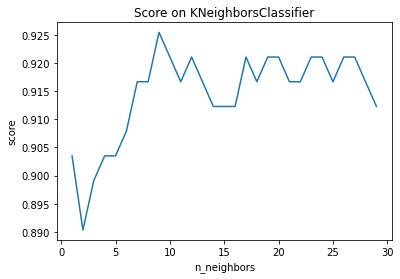

In [83]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

### Логистическая регрессия с помощью sklearn





In [84]:
#Попробум применить логистическую регресиию:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)

In [85]:
prediction[:10]

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [87]:
import numpy as np

print (np.mean(prediction == y_test))
print (classifier.score(X_test, y_test)) 

0.9298245614035088
0.9298245614035088


In [ ]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, prediction))

[[ 76  11]
 [  5 136]]


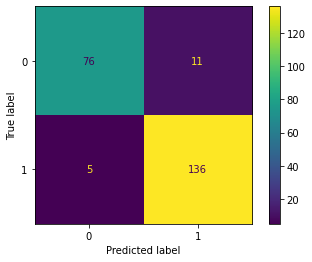

In [88]:
#Confusion matrix -правдивые, лжеправдивые, ложные и псевдоложные признаки
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test) 
plt.show()

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90        87
           1       0.93      0.96      0.94       141

    accuracy                           0.93       228
   macro avg       0.93      0.92      0.92       228
weighted avg       0.93      0.93      0.93       228



In [92]:
classifier.coef_

array([[ 1.08758614,  0.18718747, -0.47012323,  0.04613879, -0.1092043 ,
        -0.24006378, -0.38598156, -0.13559535, -0.03377296, -0.08433883,
         0.69128373, -0.29806291, -0.00970986, -0.00886899, -0.01793726,
        -0.04357236, -0.02116453, -0.02444648, -0.00218401,  0.1603467 ,
        -0.40828424, -0.03353945, -0.20523572, -0.69954715, -1.0227166 ,
        -0.37982223, -0.36630425, -0.09249648]])

In [93]:
pd.DataFrame(data = [X_train.columns, classifier.coef_[0]])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,...,fractal dimension error,worst radius,worst texture,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
1,1.08759,0.187187,-0.470123,0.0461388,-0.109204,-0.240064,-0.385982,-0.135595,-0.033773,-0.0843388,...,-0.00218401,0.160347,-0.408284,-0.0335395,-0.205236,-0.699547,-1.02272,-0.379822,-0.366304,-0.0924965


In [94]:
classifier.intercept_[0]

32.17787763925586

### Логистическая регрессия с помощью StatsModels



https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html

In [95]:
import statsmodels.api as sm

In [96]:
model = sm.Logit(y_train, X_train)
result = model.fit(method='bfgs')

         Current function value: 0.063159
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 40


/home/tater/.local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/tater/.local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/tater/.local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/tater/.local/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/tater/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [97]:
result.params

mean radius                3.649339
mean texture               0.273921
mean perimeter            -0.429562
mean area                  0.017200
mean smoothness           -0.146689
mean compactness          -0.644381
mean concavity            -0.867740
mean symmetry             -0.180355
mean fractal dimension    -0.034259
radius error              -0.065314
texture error              1.490496
perimeter error           -0.892121
area error                -0.005050
smoothness error          -0.006373
compactness error         -0.094657
concavity error           -0.120131
concave points error      -0.042000
symmetry error            -0.036270
fractal dimension error   -0.009090
worst radius               1.927877
worst texture             -0.519849
worst area                -0.052864
worst smoothness          -0.260496
worst compactness         -1.788845
worst concavity           -2.275585
worst concave points      -0.759247
worst symmetry            -0.566553
worst fractal dimension   -0

In [98]:
print (np.mean((result.predict(X_test) >= 0.5).astype(int).values == y_test))

0.9342105263157895


In [99]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  341
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                           27
Date:                Tue, 13 Oct 2020   Pseudo R-squ.:                  0.9039
Time:                        01:32:49   Log-Likelihood:                -21.537
converged:                      False   LL-Null:                       -224.07
Covariance Type:            nonrobust   LLR p-value:                 4.631e-69
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
mean radius                 3.6493     13.606      0.268      0.789     -23.017      30.316
mean texture                0.2739      0.301      0.911      0.362      -0.316       0.863


***Задание: попробуйте получить скор на тесте > 0.95 любым из предложенных методов***

# Работа с регрессией

In [100]:
from sklearn.datasets import load_boston

In [101]:
data = load_boston()
X, y = data['data'], data['target']

In [102]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [103]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [104]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [105]:
X_df = pd.DataFrame(data = X, columns=data.feature_names)
y_df = pd.Series(y)

In [106]:
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [107]:
X_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [110]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_df, y_df, test_size=0.4, random_state=23, shuffle = False)

In [111]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [112]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(prediction, y_test)

11.323954749147688

In [113]:
model.coef_

array([ 1.22779056,  0.01299667,  0.01975133,  0.66551107, -8.15919583,
        9.13669115, -0.04713707, -1.00623275,  0.12534141, -0.01485726,
       -0.61738209,  0.01680563, -0.11578353])

In [115]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
mean_absolute_error(prediction, y_test)

8.035520917907805

Сделайте перебор параметра с помощью цикла. При каком параметре будет наилучшее качество?
 

In [119]:
X_train['RAD'].value_counts()

5.0    96
4.0    84
3.0    36
8.0    24
2.0    24
6.0    18
7.0    12
1.0     9
Name: RAD, dtype: int64

In [121]:
from sklearn.preprocessing import OneHotEncoder


enc = OneHotEncoder(handle_unknown='ignore')

enc_df_train = pd.DataFrame(enc.fit_transform(X_train[['RAD']]).toarray())
enc_df_test = pd.DataFrame(enc.fit_transform(X_test[['RAD']]).toarray())

enc_df_train.columns = ['RAD_' + str(i) for i in range(len(enc_df_train.columns))]
enc_df_test.columns = ['RAD_' + str(i) for i in range(len(enc_df_test.columns))]


In [122]:
for i in enc_df_train:
  X_train[i] = enc_df_train[i].values

for i in enc_df_test:
  X_test[i] = enc_df_test[i].values

/home/tater/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tater/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [123]:
X_train = X_train.drop('RAD', axis = 1)
X_test = X_test.drop('RAD', axis = 1)

In [124]:
model = Ridge(alpha = 5)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
mean_absolute_error(prediction, y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 26)

#ДЗ № 2

В качестве домашнего задания вам предлагается поработать над предсказанием погоды в Австралии. Файл с данными пришлем вам в телеграмме. 
Вам будет доступен датасет weatherAUS.csv, ПЕРВЫЕ 75% (shuffle = False) которого нужно взять для обучения, последние 25% - для тестирования.  

Требуется построить 3 модели которые будут предсказывать целевую переменную RainTomorrow:  
1. С помощью Байесовских классификаторов 
2. С помощью логистической регрессии
3. С помощью метода ближайших соседей 

Затем следует сравнить результаты моделей (по качеству и времени выполнения) и сделать вывод о том, какая модель и с какими параметрами даёт лучшие результаты.   
**В конце ноутбука должны быть четко описаны полученные результаты и метрики.**

  
**Не забывайте о том, что работа с признаками играет очень большую роль в построении хорошей модели.** 


Краткое описание данных:
* Date - Дата наблюдений
* Location - Название локации, в которой расположена метеорологическая станция
* MinTemp - Минимальная температура в градусах цельсия
* MaxTemp - Максимальная температура в градусах цельсия
* Rainfall - Количество осадков, зафиксированных за день в мм
* Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
* Sunshine - Число солнечных часов за день
* WindGustDir - направление самого сильного порыва ветра за последние 24 часа
* WindGustSpeed -  скорость (км / ч) самого сильного порыва ветра за последние 24 часа
* WindDir9am - направление ветра в 9 утра

Вопросы можете писать в tg: ***@RAVasiliev***